In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
sns.set()

In [111]:
df_read = pd.read_csv("houses.csv")

In [112]:
df = df_read  ## keeping df_read for future
df.head()

,Způsob_koupě,Typ_obydlení,Počet_pokojů,Typ_kuchyně,Velikost_bytu,Cena,Ulice,Kraj
0,prodej,bytu,3,k,60,10129050,"Pražská, Praha 10 - Hostivař",1
1,prodej,bytu,1,k,32,6900000,"Počernická, Praha 10",1
2,prodej,bytu,2,k,51,6499000,Praha 10 - Vršovice,1
3,prodej,bytu,3,k,69,7490000,"Přímětická, Praha 4 - Michle",1
4,prodej,bytu,2,1,52,5250000,"Šumperská, Praha 9 - Letňany",1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23202 entries, 0 to 23201
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Způsob_koupě   23202 non-null  object
 1   Typ_obydlení   23202 non-null  object
 2   Počet_pokojů   23202 non-null  int64 
 3   Typ_kuchyně    23202 non-null  object
 4   Velikost_bytu  23202 non-null  int64 
 5   Cena           23202 non-null  int64 
 6   Ulice          23202 non-null  object
 7   Kraj           23202 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


(array([14227.,     0.,     0.,     0.,     0.,   362.,     0.,     0.,
            0.,  8613.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

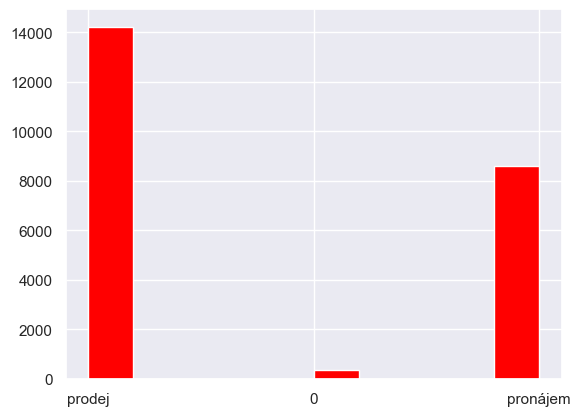

In [114]:
plt.hist(df["Způsob_koupě"],color="Red")

In [115]:
df_new = df[(df["Cena"] != 0)]
df = df_new[df_new["Způsob_koupě"] == "prodej"]

In [116]:
mapping = {
        1: "Hlavní město Praha",
        2: "Středočeský kraj",
        3: "Jihočeský kraj",
        4: "Plzeňský kraj",
        5: "Karlovarský kraj",
        6: "Ústecký kraj",
        7: "Liberecký kraj",
        8: "Královéhradecký kraj",
        9: "kraj Vysočina",
        10: "Jihomoravský kraj",
        11: "Zlínský kraj",
        12: "Olomoucký kraj",
        13: "Moravskoslezský kraj",
        14: "Pardubický kraj"    
}

df["Kraje_Název"] = df["Kraj"].map(mapping)

C:\Users\42077\AppData\Local\Temp\ipykernel_21872\970167268.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kraje_Název"] = df["Kraj"].map(mapping)


In [117]:
df.head()


,Způsob_koupě,Typ_obydlení,Počet_pokojů,Typ_kuchyně,Velikost_bytu,Cena,Ulice,Kraj,Kraje_Název
0,prodej,bytu,3,k,60,10129050,"Pražská, Praha 10 - Hostivař",1,Hlavní město Praha
1,prodej,bytu,1,k,32,6900000,"Počernická, Praha 10",1,Hlavní město Praha
2,prodej,bytu,2,k,51,6499000,Praha 10 - Vršovice,1,Hlavní město Praha
3,prodej,bytu,3,k,69,7490000,"Přímětická, Praha 4 - Michle",1,Hlavní město Praha
4,prodej,bytu,2,1,52,5250000,"Šumperská, Praha 9 - Letňany",1,Hlavní město Praha


In [118]:
region_counts = df["Kraje_Název"].value_counts()
sorted_regions = region_counts.sort_values(ascending=True)
sorted_regions


Kraje_Název
Zlínský kraj             323
kraj Vysočina            331
Pardubický kraj          394
Královéhradecký kraj     514
Liberecký kraj           566
Plzeňský kraj            577
Olomoucký kraj           703
Moravskoslezský kraj     780
Jihočeský kraj           800
Karlovarský kraj         899
Ústecký kraj            1095
Jihomoravský kraj       1173
Středočeský kraj        1537
Hlavní město Praha      3657
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Zlínský kraj'),
  Text(1, 0, 'kraj Vysočina'),
  Text(2, 0, 'Pardubický kraj'),
  Text(3, 0, 'Královéhradecký kraj'),
  Text(4, 0, 'Liberecký kraj'),
  Text(5, 0, 'Plzeňský kraj'),
  Text(6, 0, 'Olomoucký kraj'),
  Text(7, 0, 'Moravskoslezský kraj'),
  Text(8, 0, 'Jihočeský kraj'),
  Text(9, 0, 'Karlovarský kraj'),
  Text(10, 0, 'Ústecký kraj'),
  Text(11, 0, 'Jihomoravský kraj'),
  Text(12, 0, 'Středočeský kraj'),
  Text(13, 0, 'Hlavní město Praha')])

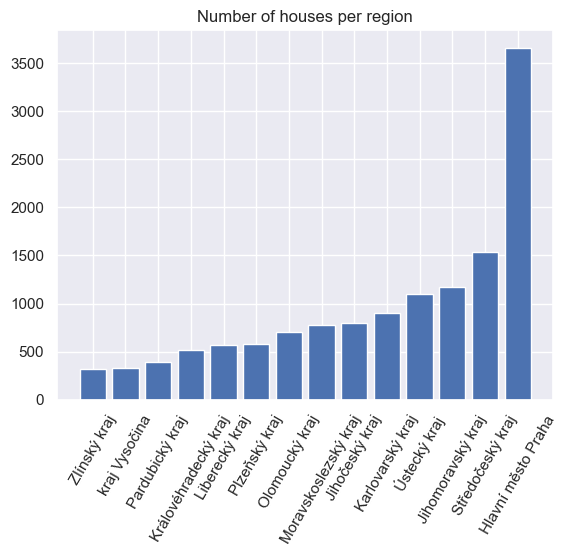

In [119]:
plt.bar(sorted_regions.index, sorted_regions.values)
plt.title("Number of houses per region")
plt.xticks(rotation = 60)

In [120]:
average_unsorted = df[["Kraje_Název", "Cena"]].groupby("Kraje_Název").mean()
average_unsorted["Cena"] = average_unsorted["Cena"].map("{:,.0f}".format)
average_unsorted["Cena"] = average_unsorted["Cena"].str.replace(',', '').astype(int)
average = average_unsorted["Cena"].sort_values(ascending=True)

Text(0.5, 1.0, 'Average house price per region')

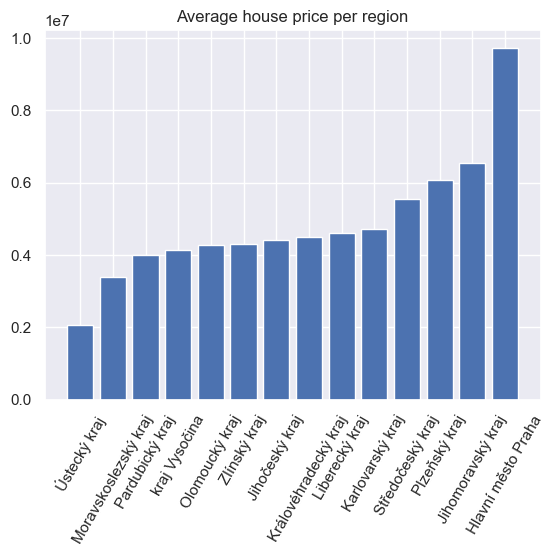

In [121]:
plt.bar(average.index, average.values)
plt.xticks(rotation = 60)
plt.title("Average house price per region")

In [122]:
m2_unsorted = df[["Kraje_Název", "Velikost_bytu"]].groupby("Kraje_Název").mean()
m2_unsorted["Velikost_bytu"] = m2_unsorted["Velikost_bytu"].map("{:,.0f}".format)
m2_unsorted["Velikost_bytu"] = m2_unsorted["Velikost_bytu"].replace(", ", "").astype(int)
m2 = m2_unsorted["Velikost_bytu"].sort_values(ascending = True)

Text(0.5, 1.0, 'average m2 per region')

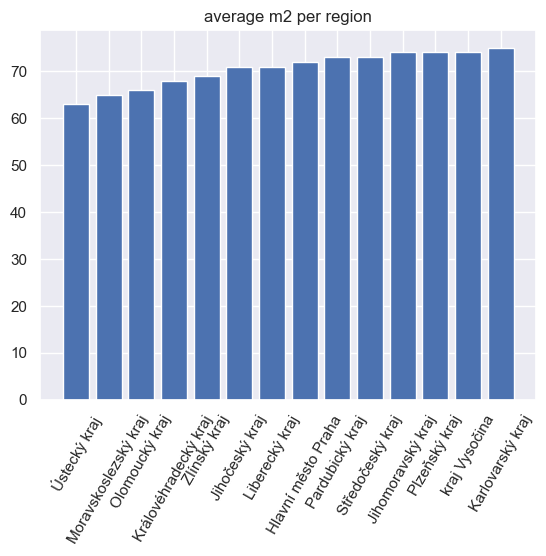

In [123]:
plt.bar(m2.index, m2.values)
plt.xticks(rotation = 60)
plt.title("average m2 per region")

In [124]:
cost_of_m2 = pd.DataFrame(
    {
        "kraj": m2_unsorted.index,
        "price": average_unsorted.values.ravel().astype(int),
        "m2": m2_unsorted.values.ravel()
    }
)

In [125]:
cost_of_m2["avg"] = cost_of_m2["price"]/cost_of_m2["m2"]
cost_of_m2

,kraj,price,m2,avg
0,Hlavní město Praha,9728134,72,135112.972222
1,Jihomoravský kraj,6556282,74,88598.405405
2,Jihočeský kraj,4414583,71,62177.225352
3,Karlovarský kraj,4734011,75,63120.146667
4,Královéhradecký kraj,4503875,68,66233.455882
5,Liberecký kraj,4614442,71,64992.140845
6,Moravskoslezský kraj,3387370,65,52113.384615
7,Olomoucký kraj,4288768,66,64981.333333
8,Pardubický kraj,4000667,73,54803.657534
9,Plzeňský kraj,6066738,74,81982.945946


Text(0.5, 1.0, 'Cost of m2 per region')

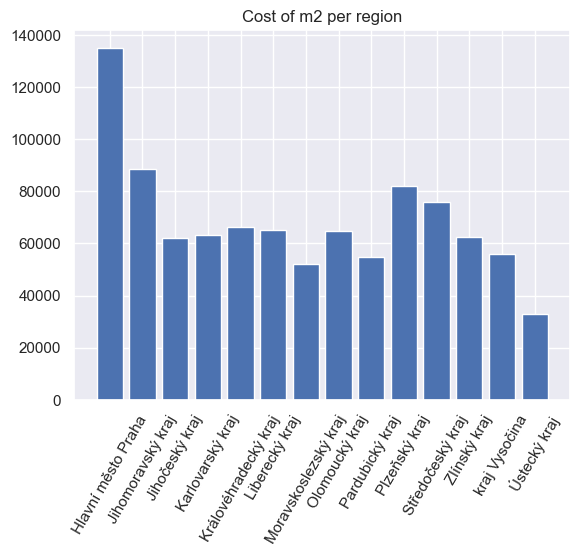

In [126]:
plt.bar(cost_of_m2["kraj"], cost_of_m2["avg"])
plt.xticks(rotation = 60)
plt.title("Cost of m2 per region")

In [127]:
df_types = df[df["Počet_pokojů"] < 5]
df_types.head()

,Způsob_koupě,Typ_obydlení,Počet_pokojů,Typ_kuchyně,Velikost_bytu,Cena,Ulice,Kraj,Kraje_Název
0,prodej,bytu,3,k,60,10129050,"Pražská, Praha 10 - Hostivař",1,Hlavní město Praha
1,prodej,bytu,1,k,32,6900000,"Počernická, Praha 10",1,Hlavní město Praha
2,prodej,bytu,2,k,51,6499000,Praha 10 - Vršovice,1,Hlavní město Praha
3,prodej,bytu,3,k,69,7490000,"Přímětická, Praha 4 - Michle",1,Hlavní město Praha
4,prodej,bytu,2,1,52,5250000,"Šumperská, Praha 9 - Letňany",1,Hlavní město Praha


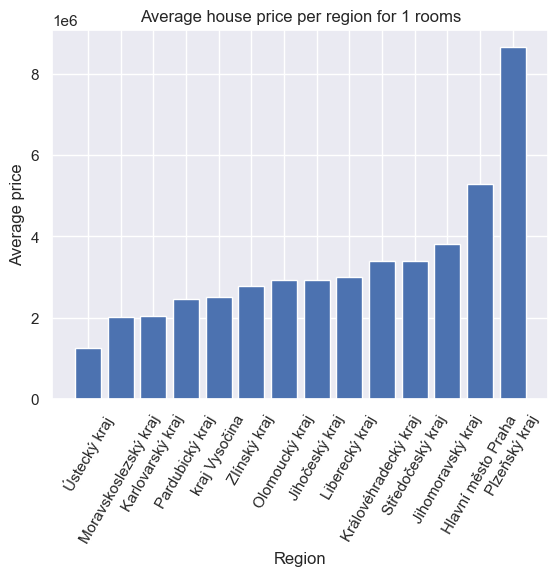

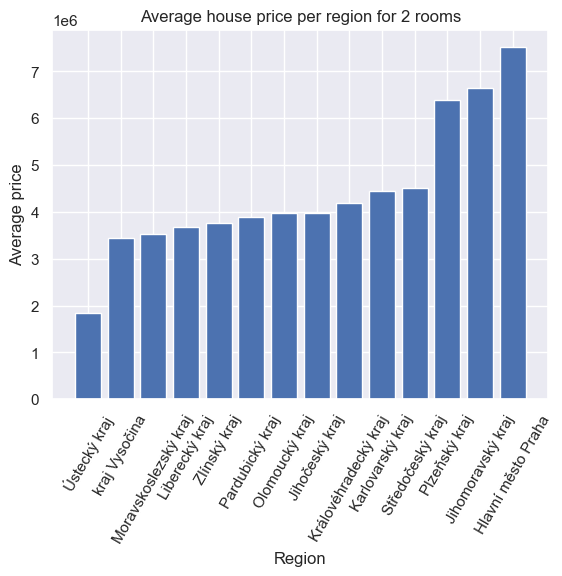

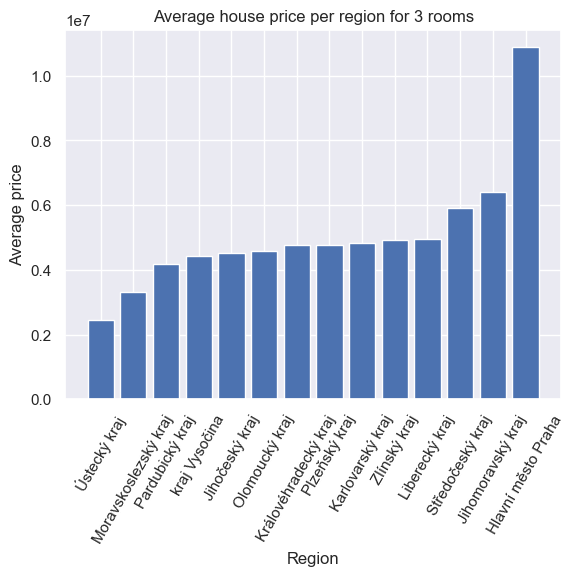

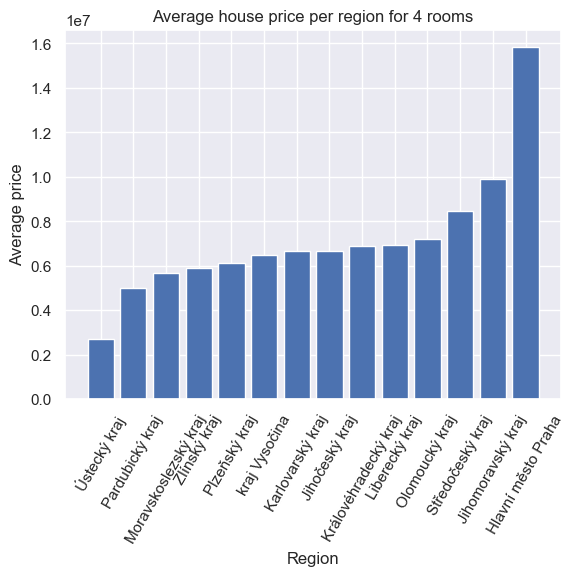

In [128]:
for i in range(1,5):
    df_types = df[df["Počet_pokojů"] == i]
    price = df_types[["Cena", "Kraje_Název"]].groupby("Kraje_Název").mean()
    sorted_values = price.sort_values(by="Cena", ascending=True)
    
    plt.bar(sorted_values.index.ravel(), sorted_values.values.ravel())
    plt.xticks(rotation=60)
    plt.ylim(0, None)
    plt.title(f"Average house price per region for {i} rooms")
    plt.xlabel("Region")
    plt.ylabel("Average price")
    plt.show()

Renting



In [129]:
df_new = df[(df["Cena"] != 0)]
df = df_new[df_new["Způsob_koupě"] == "pronájem"]